<a href="https://colab.research.google.com/github/Karim-Anwar/masterProject/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personal Information
Name: **Karim Anwar**

StudentID: **13994565**

Email: [**karim.anwar@student.uva.nl**](karim.anwar@student.uva.nl)

Submitted on: **19.03.2023**

Github: [**Github repository**](https://github.com/Karim-Anwar/masterProject)

# Data Context
<!-- **In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.** -->

**For this thesis I have for objective to outperform the automated light controls present in the rooms of the LAB42 building integrated from Delta Controls. The datasources are extracted from the UvA CopperCube data management server provided by the University. In this EDA I look at the diffrent datasets produced by the diffrent sensors present in the diffrent rooms of the building and trying to find if there is significant interactions between the sensors to improve how automated light from wasting energy by having the wrong levels to compensate fro the lack of natural light that reaches the rooms.
All the data we use are Time Series Data and we analysis the signals created from them.**


# Data Description

The notebook is sectioned currently into 6 parts:

*   Connection to drive, imports, and Data loading
*   Initial analysis on what we have in the data sets (missing values, min-max values), distribution of the values per hour, initial data is in minutes.
* Plots of diffrent rooms of the building to see if the data is correlated graphically
* Data plots and trend and seasonality of the data exculding the school holidays (which we could consider as outliers since there is the least activity during that time
* Planned removal of outlier 0 values which could represent malfunctions in the data to improve analysis

We discovered initially that there is some kind of correlation between the shade sensors(daylight sensor) and the roomlight sensors where the signals from the roomlight is additive to the daylight sensor. We wanted as well to see how much the motion detection for certain rooms that have them if the could be a cause that can affect the values of the other data. All plots are preloaded to be looked at.
We look at some specific dates that both of the three sensors might have some kind of similar interactions and we would want in future work to see if there is other sensors that could affect the light levels of the room and how are the interacting with each other as well as to do some statistical analysis to see if how much energy is consumbed if we get the data from architects. We want to as well to get explination from the architects to what the nomenclature of the tables are for which exact rooms since we can only decipher which floor they are on and see how neoighbouring rooms interact at similar times to see if the machine behaviour can be improved if the data is shared between these rooms as well.




### Data Loading

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import scipy

In [61]:
# Load your data here
daylight_csv = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/UvA_LAB42_450400_TL161_daylight.csv', names = ['seq', 'time', 'value'])
roomlight_csv = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/UvA_LAB42_450400_TL162_roomlight.csv', names = ['seq', 'time', 'value'])
daylight_csv_06 = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/UvA_LAB42_460500_TL161.csv', names = ['seq', 'time', 'value'])
roomlight_csv_06 = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/UvA_LAB42_460500_TL162.csv', names = ['seq', 'time', 'value'])
motion_csv_06 = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/UvA_LAB42_460500_TL1.csv', names = ['seq', 'time', 'value'])

### Analysis 1: 
Data inspection and initial cleaning and information about distributions


In [62]:
# Also don't forget to comment your code
# This way it's also easier to spot thought errors along the way
daylight_csv.head(5)

,seq,time,value
0,1000152327,2022-11-03 11:52:00,5.0
1,1000152328,2022-11-03 11:53:00,5.0
2,1000152329,2022-11-03 11:54:00,5.0
3,1000152330,2022-11-03 11:55:00,5.0
4,1000152331,2022-11-03 11:56:00,5.0


In [63]:
roomlight_csv.head(5)

,seq,time,value
0,1000152327,2022-11-03 11:52:00,80
1,1000152328,2022-11-03 11:53:00,80
2,1000152329,2022-11-03 11:54:00,80
3,1000152330,2022-11-03 11:55:00,80
4,1000152331,2022-11-03 11:56:00,80


In [64]:
daylight_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134759 entries, 0 to 134758
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   seq     134759 non-null  int64  
 1   time    134759 non-null  object 
 2   value   134759 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ MB


In [65]:
roomlight_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134759 entries, 0 to 134758
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   seq     134759 non-null  int64 
 1   time    134759 non-null  object
 2   value   134759 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.1+ MB


In [66]:
print(min(daylight_csv['value']))
print(max(daylight_csv['value']))

0.0
100.0


In [67]:
print(min(roomlight_csv['value']))
print(max(roomlight_csv['value']))

0
100


Since we dont really have a discription what value correspond too we can now assume that sicne they are from 0 to 100 they work like a percentage and we can takle that into account as it is light intensity.

In [68]:
print((daylight_csv['value'].mean()))

12.47877042228222


In [69]:
print((roomlight_csv['value'].mean()))

12.675813860298755


In [70]:
print("first instance: " + daylight_csv['time'][0], " latest instance: " + daylight_csv['time'][-1:])

first instance: 2022-11-03 11:52:00 134758     latest instance: 2023-02-28 16:08:00
Name: time, dtype: object


In [71]:
daylight_csv.head(60)

,seq,time,value
0,1000152327,2022-11-03 11:52:00,5.0
1,1000152328,2022-11-03 11:53:00,5.0
2,1000152329,2022-11-03 11:54:00,5.0
3,1000152330,2022-11-03 11:55:00,5.0
4,1000152331,2022-11-03 11:56:00,5.0
5,1000152332,2022-11-03 11:57:00,5.0
6,1000152333,2022-11-03 11:58:00,5.0
7,1000152334,2022-11-03 11:59:00,5.0
8,1000152336,2022-11-03 12:01:00,5.0
9,1000152337,2022-11-03 12:02:00,5.0


In [72]:
daylight_csv['time'].dtype

dtype('O')

In [73]:
daylight_csv['time'] = pd.to_datetime(daylight_csv['time'])
roomlight_csv['time'] = pd.to_datetime(roomlight_csv['time'])
daylight_csv_06['time'] = pd.to_datetime(daylight_csv_06['time'])
roomlight_csv_06['time'] = pd.to_datetime(roomlight_csv_06['time'])
motion_csv_06['time'] = pd.to_datetime(motion_csv_06['time'])



In [74]:
daylight_csv['time'].dtype

dtype('<M8[ns]')

In [75]:
dist_day = daylight_csv.groupby([daylight_csv['time'].dt.hour]).value.mean()

In [76]:
roomlight_csv['time'] = pd.to_datetime(roomlight_csv['time'])

In [77]:
dist_room = roomlight_csv.groupby([roomlight_csv['time'].dt.hour]).value.mean()
print(dist_room)

time
0      0.000000
1      0.000000
2      0.017737
3      0.035511
4      0.035939
5      0.000000
6      1.401434
7      9.641577
8      9.050360
9     11.372760
10    21.921147
11    24.113120
12    26.794803
13    28.019152
14    30.148936
15    31.264409
16    31.433654
17    29.021277
18    19.336762
19    11.524823
20     7.482654
21     5.904255
22     3.897163
23     1.517730
Name: value, dtype: float64


In [78]:
df_dist_room = dist_room.reset_index()

In [79]:
df_dist_room

,time,value
0,0,0.000000
1,1,0.000000
2,2,0.017737
3,3,0.035511
4,4,0.035939
5,5,0.000000
6,6,1.401434
7,7,9.641577
8,8,9.050360
9,9,11.372760


<BarContainer object of 24 artists>

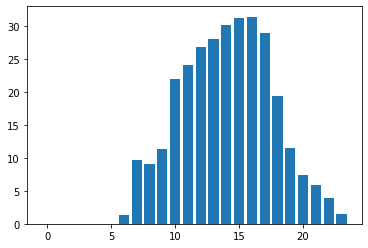

In [80]:
plt.bar(df_dist_room['time'],df_dist_room['value'])

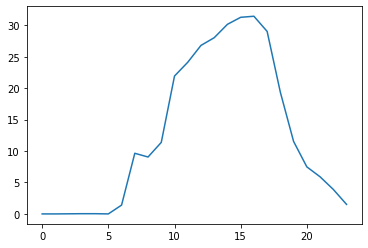

In [81]:
plt.plot(df_dist_room['time'],df_dist_room['value'])

In [82]:
df_dist_day = dist_day.reset_index()

<BarContainer object of 24 artists>

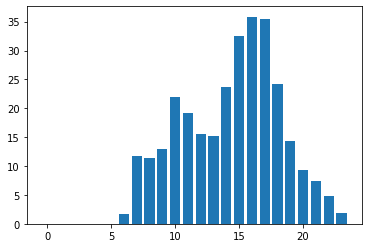

In [83]:
plt.bar(df_dist_day['time'],df_dist_day['value'])

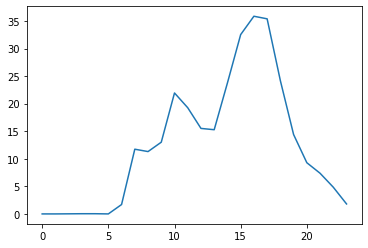

In [84]:
plt.plot(df_dist_day['time'],df_dist_day['value'])

In [85]:
daylight_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134759 entries, 0 to 134758
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   seq     134759 non-null  int64         
 1   time    134759 non-null  datetime64[ns]
 2   value   134759 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.1 MB


In [86]:
daylight_csv_hour = daylight_csv.drop(columns=['seq']).set_index('time').resample('1H').mean()

In [87]:
daylight_csv_hour.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2814 entries, 2022-11-03 11:00:00 to 2023-02-28 16:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   2250 non-null   float64
dtypes: float64(1)
memory usage: 44.0 KB


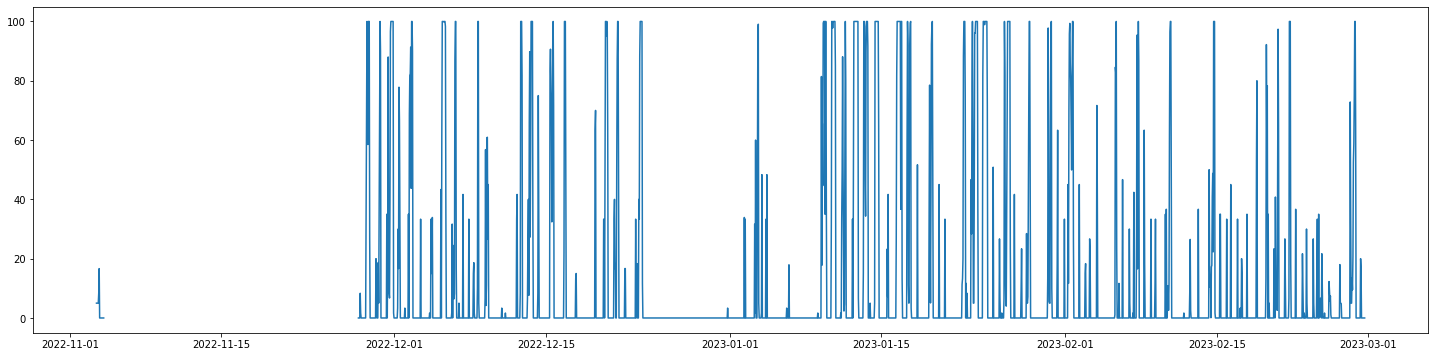

In [88]:
plt.figure(figsize=(25,6))
plt.plot(daylight_csv_hour)

In [89]:
roomlight_csv_hour = roomlight_csv.drop(columns=['seq']).set_index('time').resample('1H').mean()

In [90]:
roomlight_csv_hour.tail(30)

,value
time,
2023-02-27 11:00:00,80.000000
2023-02-27 12:00:00,34.666667
2023-02-27 13:00:00,80.000000
2023-02-27 14:00:00,80.000000
2023-02-27 15:00:00,80.000000
2023-02-27 16:00:00,80.000000
2023-02-27 17:00:00,80.000000
2023-02-27 18:00:00,80.000000
2023-02-27 19:00:00,80.000000


In [91]:
daylight_csv_hour.tail(30)

,value
time,
2023-02-27 11:00:00,5.001806
2023-02-27 12:00:00,13.384486
2023-02-27 13:00:00,9.496115
2023-02-27 14:00:00,20.869704
2023-02-27 15:00:00,52.581164
2023-02-27 16:00:00,59.008799
2023-02-27 17:00:00,75.405541
2023-02-27 18:00:00,100.000000
2023-02-27 19:00:00,100.000000


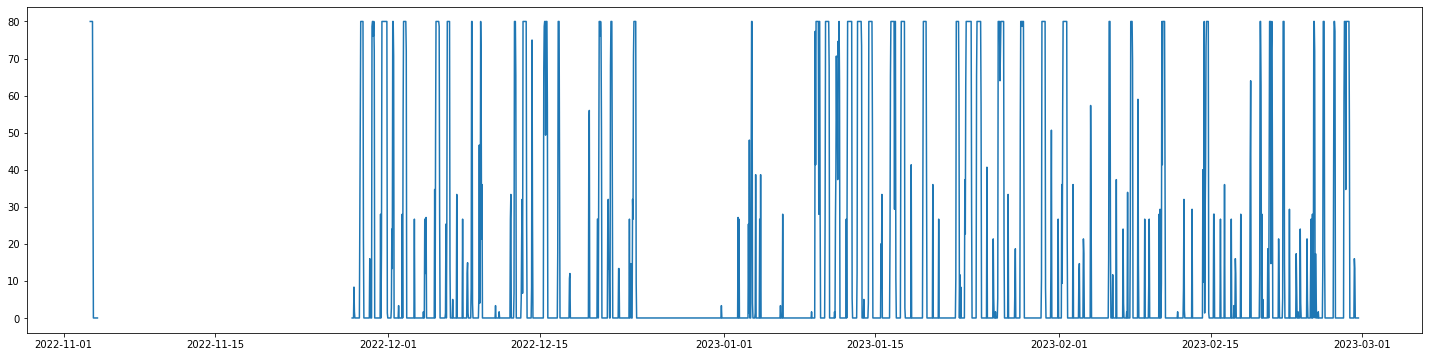

In [92]:
plt.figure(figsize=(25,6))
plt.plot(roomlight_csv_hour)

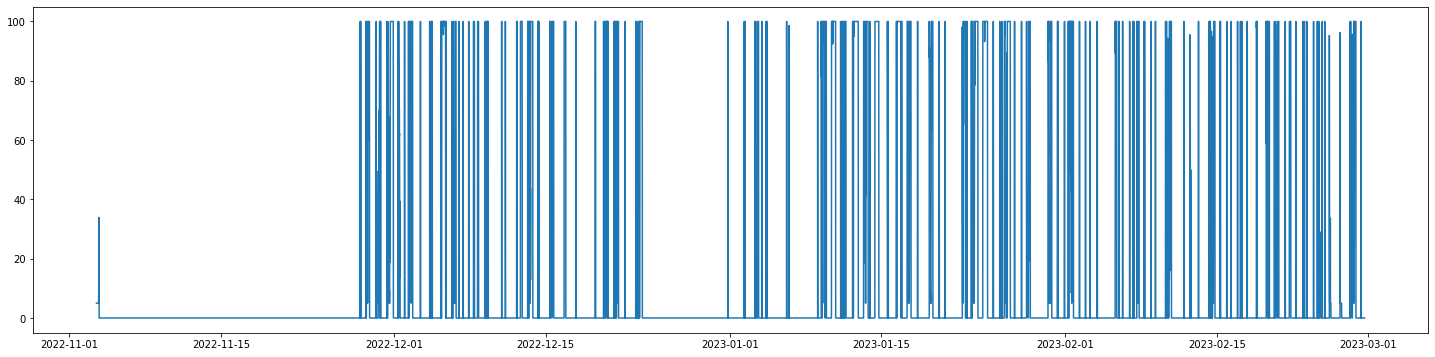

In [93]:
plt.figure(figsize=(25,6))
plt.plot(daylight_csv['time'], daylight_csv['value'])

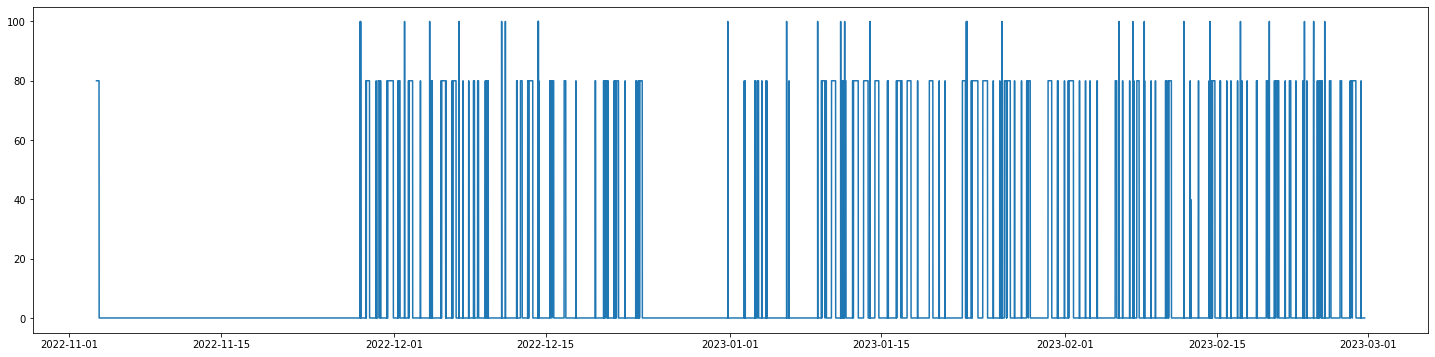

In [94]:
plt.figure(figsize=(25,6))
plt.plot(roomlight_csv['time'], roomlight_csv['value'])

In [95]:
daylight_csv['time'].is_unique

False

In [96]:
df2 = daylight_csv.pivot_table(index = ['time'], aggfunc ='size')
print(df2)

time
2022-11-03 11:52:00    1
2022-11-03 11:53:00    1
2022-11-03 11:54:00    1
2022-11-03 11:55:00    1
2022-11-03 11:56:00    1
                      ..
2023-02-28 16:04:00    1
2023-02-28 16:05:00    1
2023-02-28 16:06:00    1
2023-02-28 16:07:00    1
2023-02-28 16:08:00    1
Length: 134757, dtype: int64


In [97]:
df2[df2 > 1]

time
2022-12-28 00:04:00    2
2023-02-15 00:08:00    2
dtype: int64

In [98]:
daylight_csv[daylight_csv['time'] == '2022-12-28 00:04:00']

,seq,time,value
44585,1000230828,2022-12-28 00:04:00,0.0
44586,1000230830,2022-12-28 00:04:00,0.0


In [99]:
daylight_csv[daylight_csv['time'] == '2023-02-15 00:08:00']

,seq,time,value
115087,1000301413,2023-02-15 00:08:00,0.0
115088,1000301415,2023-02-15 00:08:00,0.0


### Analysis 2: 

We have the read values from each minute since 2022-11-03 till current time today (when data got extracted) which is too many instances, we will average the light intensity for per hour and look for correlation between outdoor intesity ie.daylight and indoor intensity ie.roomlight .

In [100]:
day = daylight_csv.drop(['seq'], axis=1).drop(index=[44585,115087]).set_index('time')
room = roomlight_csv.drop(['seq'], axis=1).drop(index=[44585,115087]).set_index('time')

In [101]:
day06 = daylight_csv_06.drop(['seq'], axis=1).set_index('time')
room06 = roomlight_csv_06.drop(['seq'], axis=1).set_index('time')
motion06 = motion_csv_06.drop(['seq'], axis=1).set_index('time')

In [102]:
print(daylight_csv_06['time'].is_unique)
print(roomlight_csv_06['time'].is_unique)
print(motion_csv_06['time'].is_unique)

False
False
False


In [103]:
df_count06 = daylight_csv_06.pivot_table(index = ['time'], aggfunc ='size')
df_count06[df_count06 > 1]

time
2022-12-28 00:04:00    2
2023-01-08 01:57:00    2
2023-01-08 01:58:00    2
2023-01-08 01:59:00    2
2023-01-08 02:00:00    2
                      ..
2023-01-09 02:09:00    2
2023-01-09 02:10:00    2
2023-01-09 02:11:00    2
2023-01-09 02:12:00    2
2023-02-15 00:08:00    2
Length: 1458, dtype: int64

In [104]:
df_count06r = roomlight_csv_06.pivot_table(index = ['time'], aggfunc ='size')
df_count06r[df_count06r > 1]

time
2022-12-28 00:04:00    2
2023-01-08 01:57:00    2
2023-01-08 01:58:00    2
2023-01-08 01:59:00    2
2023-01-08 02:00:00    2
                      ..
2023-01-09 02:09:00    2
2023-01-09 02:10:00    2
2023-01-09 02:11:00    2
2023-01-09 02:12:00    2
2023-02-15 00:08:00    2
Length: 1458, dtype: int64

In [105]:
df_count06m = motion_csv_06.pivot_table(index = ['time'], aggfunc ='size')
df_count06m[df_count06m > 1]

time
2022-11-03 12:39:02    2
2022-11-03 13:46:33    2
2022-11-30 13:53:31    2
2022-11-30 20:06:42    2
2022-12-01 10:01:31    2
2022-12-01 13:22:35    2
2022-12-01 13:50:09    2
2022-12-01 19:32:17    2
2022-12-02 10:08:49    2
2022-12-02 18:46:25    2
2022-12-05 09:50:02    2
2022-12-05 13:15:27    2
2022-12-05 13:42:11    2
2022-12-05 14:05:41    2
2022-12-05 14:55:39    2
2022-12-05 18:10:02    2
2022-12-06 08:26:59    2
2022-12-06 08:47:30    2
2022-12-06 10:27:53    2
2022-12-06 13:03:19    2
2022-12-06 13:43:03    2
2022-12-06 18:54:22    2
2022-12-07 13:26:29    2
2022-12-07 19:05:06    2
2022-12-08 09:47:23    2
2022-12-08 13:57:46    2
2022-12-08 13:59:44    2
2022-12-08 16:29:09    2
2022-12-08 16:55:42    2
2022-12-08 19:46:59    2
2022-12-09 12:27:33    2
2022-12-09 13:51:37    2
2022-12-09 14:36:59    2
2022-12-09 18:55:34    2
2022-12-12 10:11:58    2
2022-12-12 15:04:20    2
2022-12-12 19:32:09    2
2022-12-12 21:43:18    2
2022-12-13 07:59:47    2
2022-12-13 08:20:36 

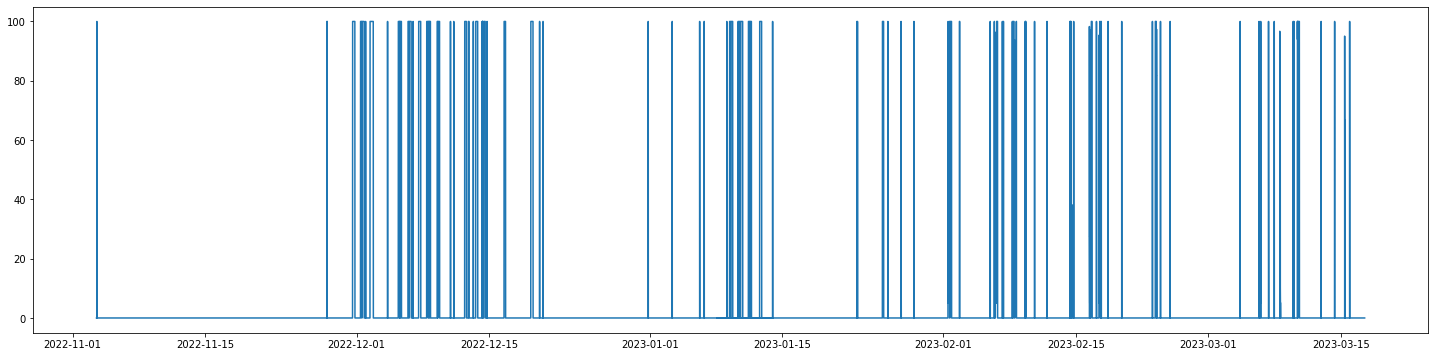

In [106]:
plt.figure(figsize=(25,6))
plt.plot(day06)

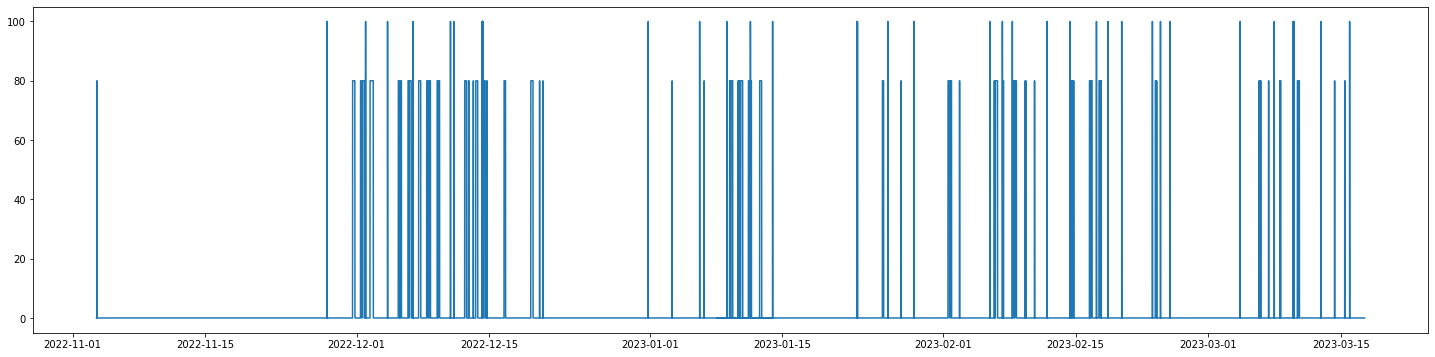

In [107]:
plt.figure(figsize=(25,6))
plt.plot(room06)

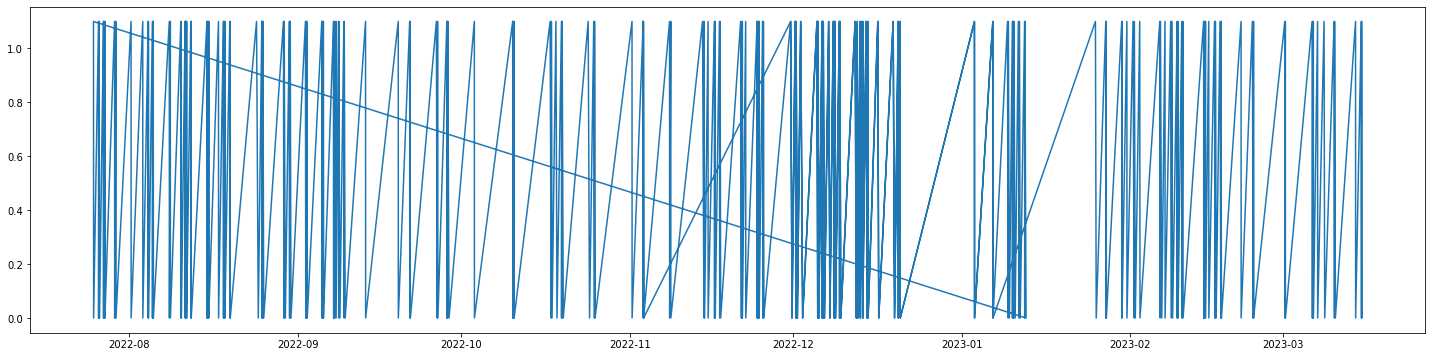

In [108]:
plt.figure(figsize=(25,6))
plt.plot(motion06)

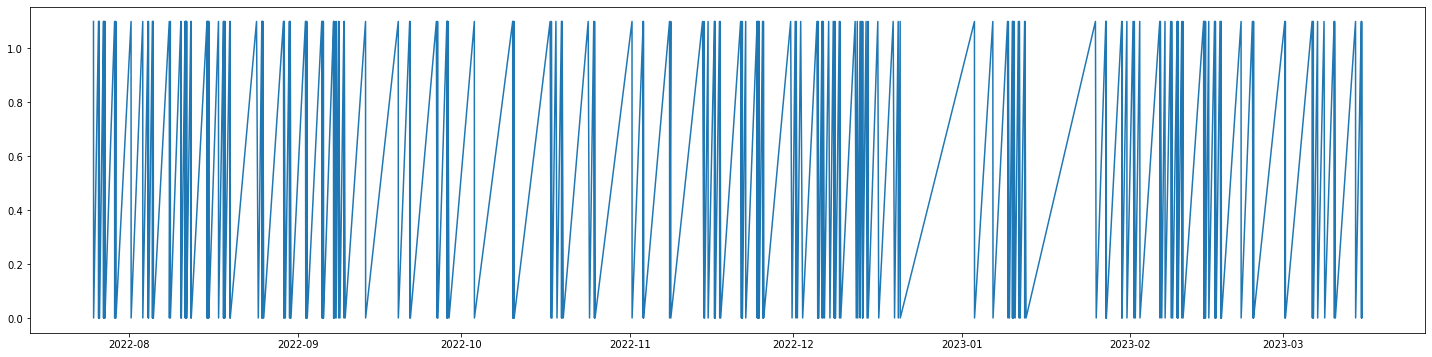

In [109]:
plt.figure(figsize=(25,6))
plt.plot(motion06.sort_index())

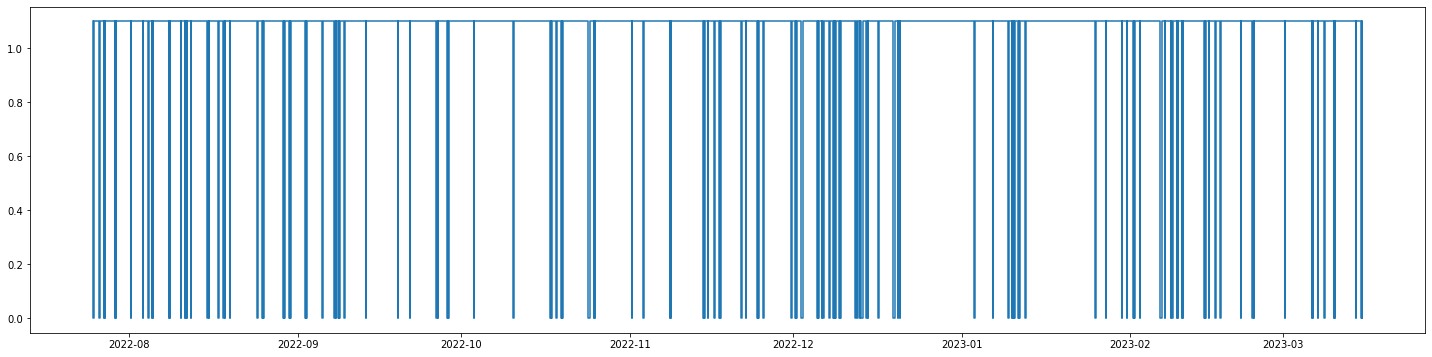

In [110]:
plt.figure(figsize=(25,6))
plt.step(motion06.sort_index().index, motion06.sort_index())

In [111]:
motion06['2022-12-01']

<ipython-input-111-b53f2328fc6f>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  motion06['2022-12-01']


,value
time,
2022-12-01 10:01:31,1.1
2022-12-01 13:22:35,0.0
2022-12-01 13:50:09,1.1
2022-12-01 19:32:17,0.0
2022-12-01 10:01:31,1.1
2022-12-01 13:22:35,0.0
2022-12-01 13:50:09,1.1
2022-12-01 19:32:17,0.0


<ipython-input-112-1c707c173691>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(motion06['2022-12-01'].sort_index())


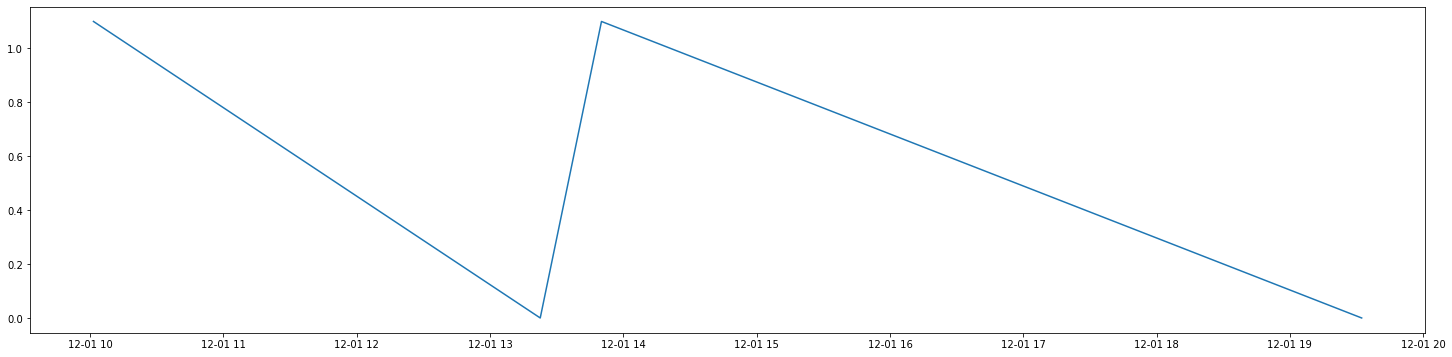

In [112]:
plt.figure(figsize=(25,6))
plt.plot(motion06['2022-12-01'].sort_index())

In [113]:
sortedm06 = motion06['2022-12-01'].sort_index()

<ipython-input-113-e28aa490ecc2>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sortedm06 = motion06['2022-12-01'].sort_index()


<ipython-input-114-2a0e9183e464>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.step(motion06['2022-12-01'].sort_index().index, motion06['2022-12-01'].sort_index())


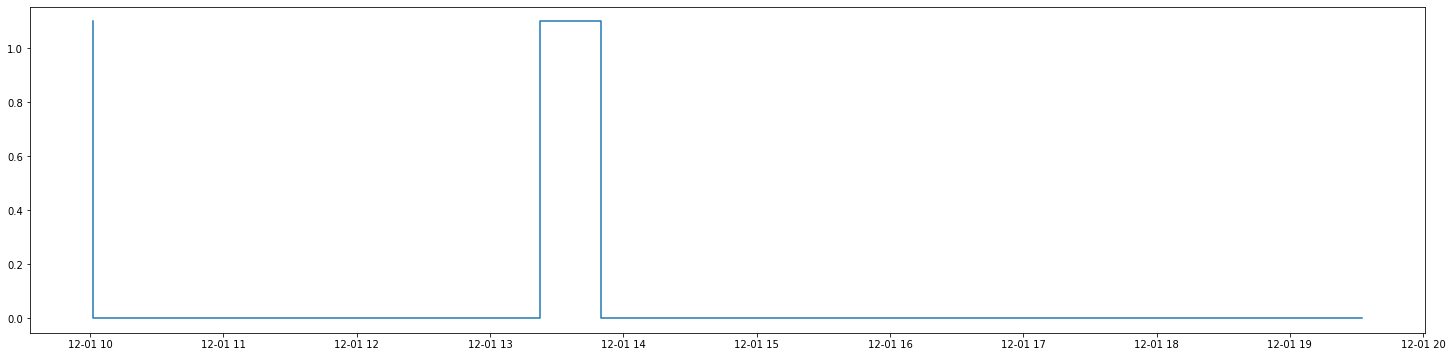

In [114]:
plt.figure(figsize=(25,6))
plt.step(motion06['2022-12-01'].sort_index().index, motion06['2022-12-01'].sort_index())

In [115]:
sortedm06

,value
time,
2022-12-01 10:01:31,1.1
2022-12-01 10:01:31,1.1
2022-12-01 13:22:35,0.0
2022-12-01 13:22:35,0.0
2022-12-01 13:50:09,1.1
2022-12-01 13:50:09,1.1
2022-12-01 19:32:17,0.0
2022-12-01 19:32:17,0.0


In [116]:
filleddata = sortedm06[::2].resample('1T').ffill()

In [117]:
filleddata

,value
time,
2022-12-01 10:01:00,NaN
2022-12-01 10:02:00,1.1
2022-12-01 10:03:00,1.1
2022-12-01 10:04:00,1.1
2022-12-01 10:05:00,1.1
...,...
2022-12-01 19:28:00,1.1
2022-12-01 19:29:00,1.1
2022-12-01 19:30:00,1.1


In [118]:
date = pd.date_range(start='2022-12-01', end='2022-12-02', freq='1T')
date

DatetimeIndex(['2022-12-01 00:00:00', '2022-12-01 00:01:00',
               '2022-12-01 00:02:00', '2022-12-01 00:03:00',
               '2022-12-01 00:04:00', '2022-12-01 00:05:00',
               '2022-12-01 00:06:00', '2022-12-01 00:07:00',
               '2022-12-01 00:08:00', '2022-12-01 00:09:00',
               ...
               '2022-12-01 23:51:00', '2022-12-01 23:52:00',
               '2022-12-01 23:53:00', '2022-12-01 23:54:00',
               '2022-12-01 23:55:00', '2022-12-01 23:56:00',
               '2022-12-01 23:57:00', '2022-12-01 23:58:00',
               '2022-12-01 23:59:00', '2022-12-02 00:00:00'],
              dtype='datetime64[ns]', length=1441, freq='T')

In [119]:
filleddata02 =filleddata
dummy = pd.Series(np.zeros(len(date)), index=date)

In [120]:
dummy2 = pd.concat([dummy, filleddata02])

In [121]:
dummy2['value']=dummy2['value'].fillna(method='bfill')

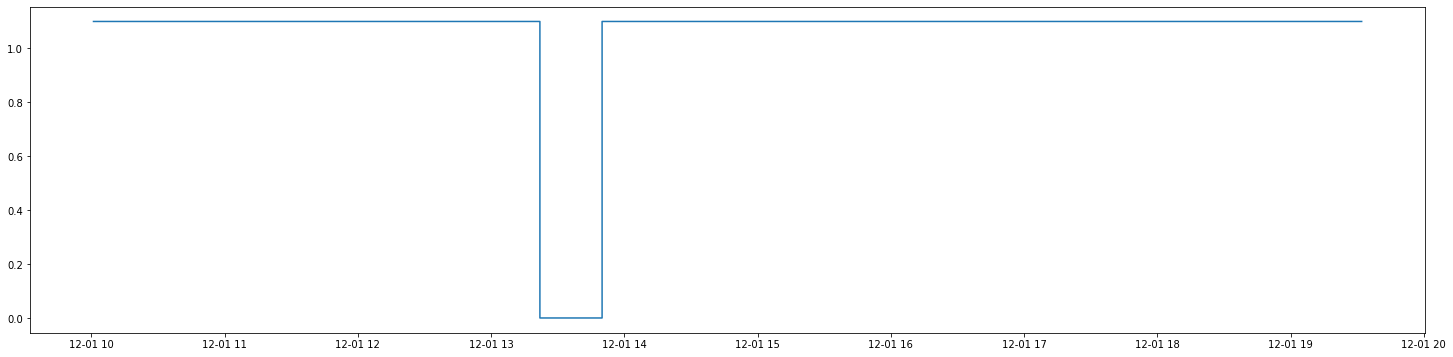

In [122]:
plt.figure(figsize=(25,6))
plt.step(filleddata.index, filleddata.sort_index())


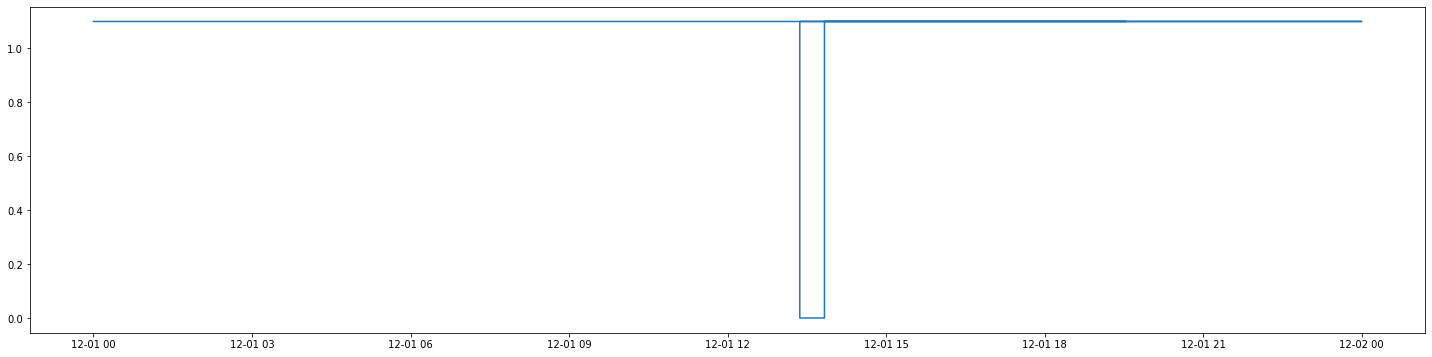

In [123]:
plt.figure(figsize=(25,6))
plt.step(dummy2.index, dummy2['value'])

<ipython-input-124-224de0660eb2>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(day06['2022-12-01'])


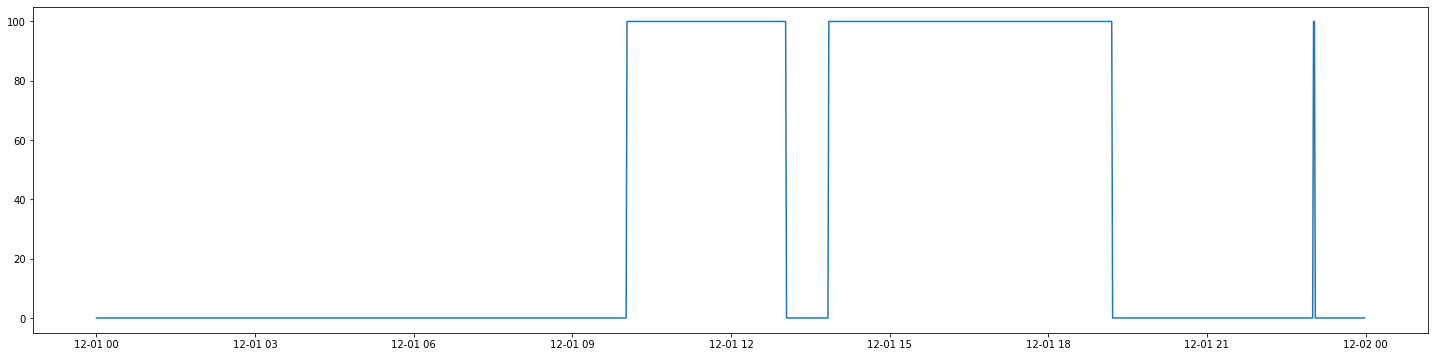

In [124]:
plt.figure(figsize=(25,6))
plt.plot(day06['2022-12-01'])

<ipython-input-125-b88bb4a133d3>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(room06['2022-12-01'])


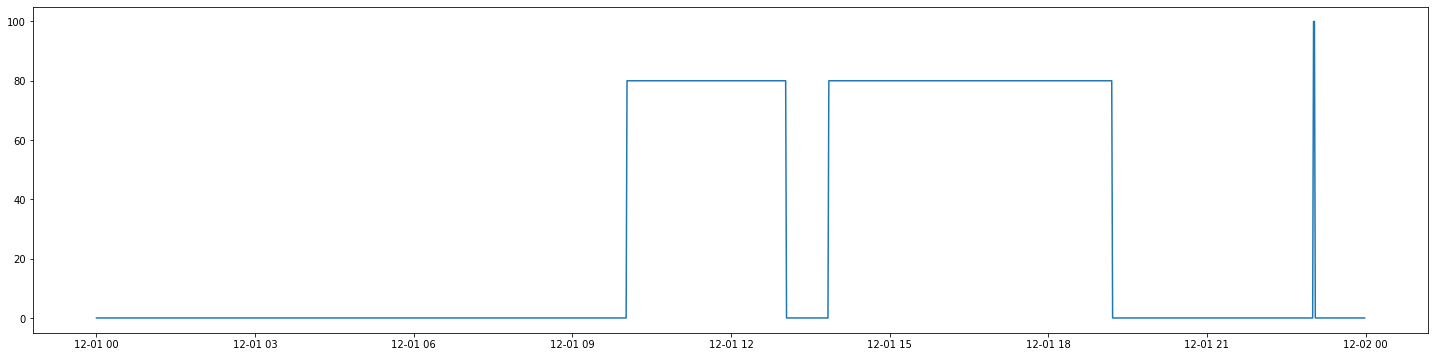

In [125]:
plt.figure(figsize=(25,6))
plt.plot(room06['2022-12-01'])

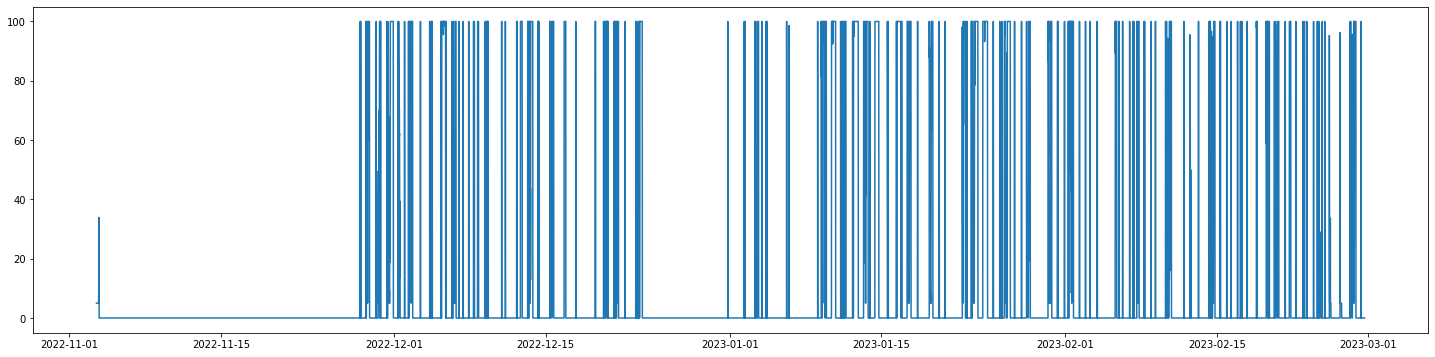

In [126]:
plt.figure(figsize=(25,6))
plt.plot(day)

<ipython-input-127-dea1a35df7b0>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(day['2022-12-15'])


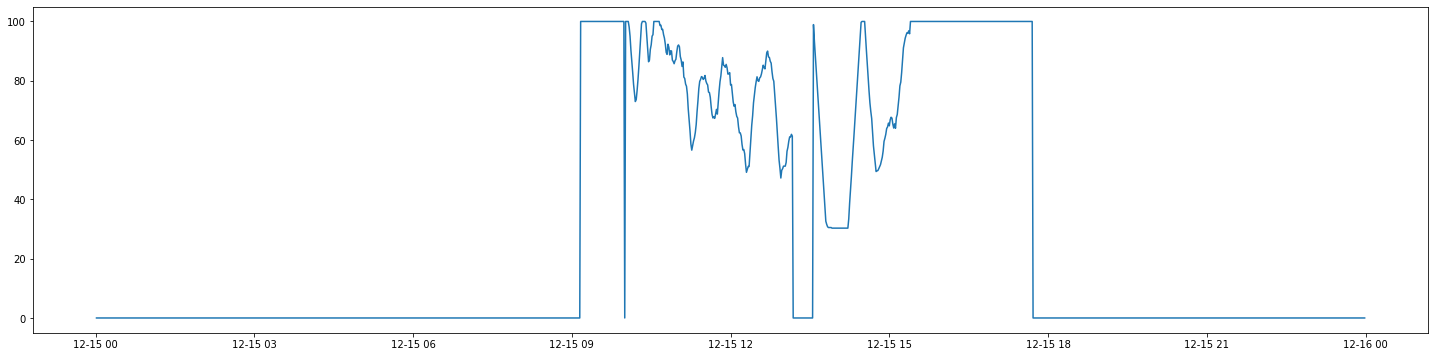

In [127]:
plt.figure(figsize=(25,6))
plt.plot(day['2022-12-15'])

<ipython-input-128-46e4cb6851a1>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(room['2022-12-15'])


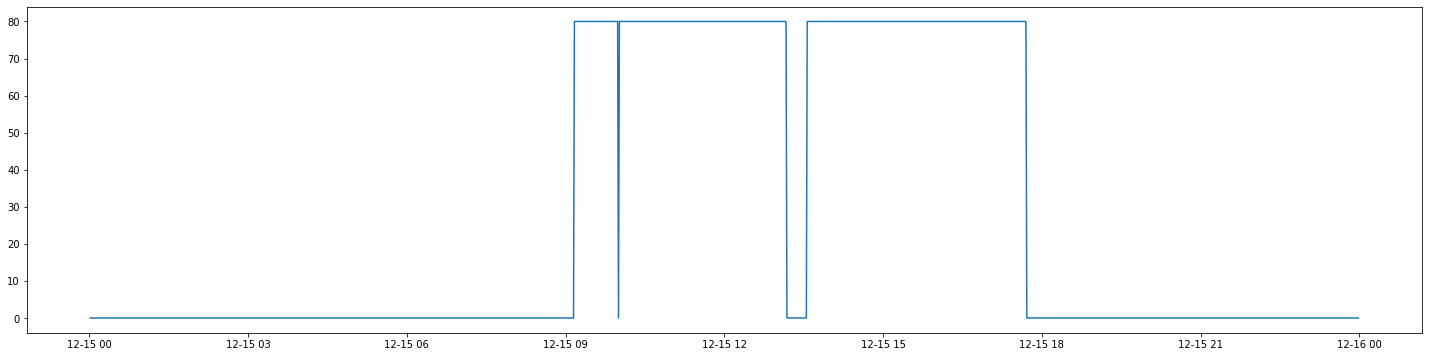

In [128]:
plt.figure(figsize=(25,6))
plt.plot(room['2022-12-15'])

<ipython-input-129-1b0a1af5c811>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(day['2023-02-23'])


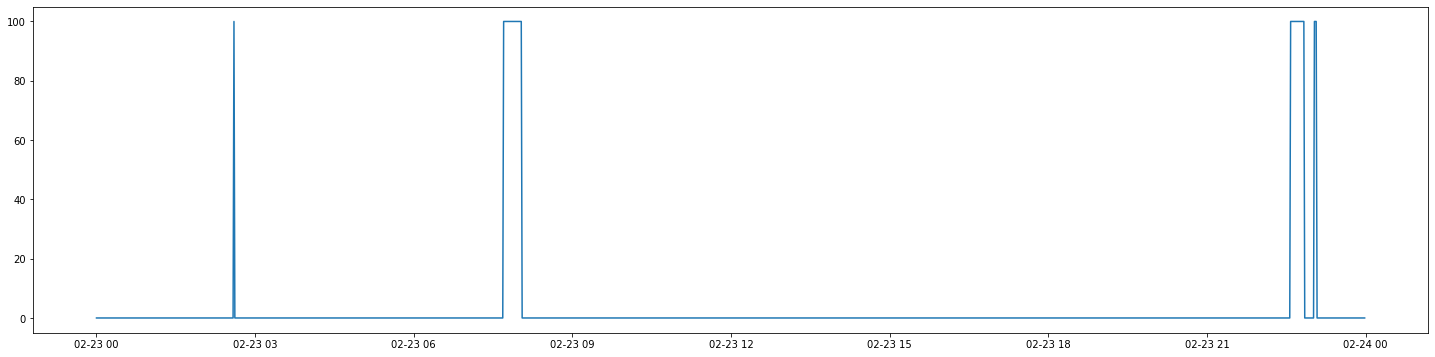

In [129]:
plt.figure(figsize=(25,6))
plt.plot(day['2023-02-23'])

<ipython-input-130-39c9b271c084>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(room['2023-02-23'])


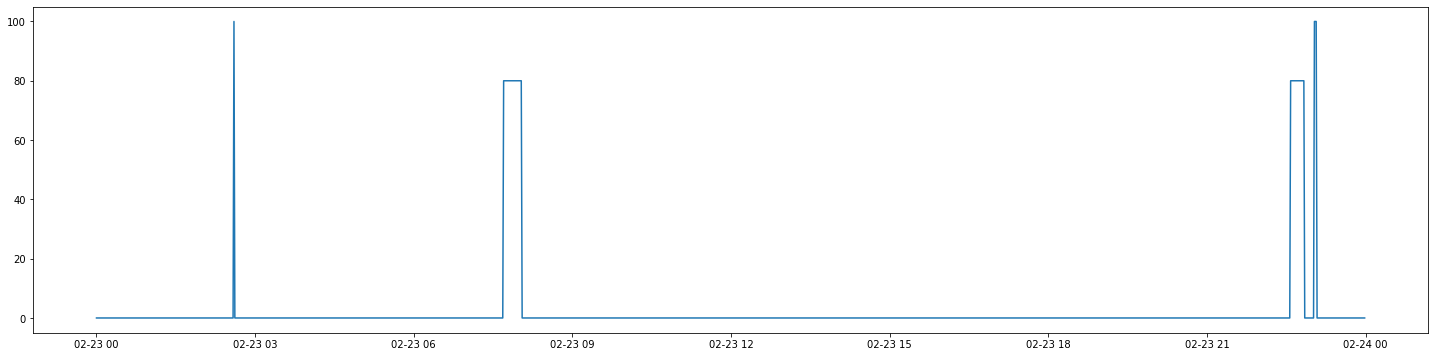

In [130]:
plt.figure(figsize=(25,6))
plt.plot(room['2023-02-23'])

In [131]:
day[-100000:]

,value
time,
2022-12-21 04:06:00,0.0
2022-12-21 04:07:00,0.0
2022-12-21 04:08:00,0.0
2022-12-21 04:09:00,0.0
2022-12-21 04:10:00,0.0
...,...
2023-02-28 16:04:00,0.0
2023-02-28 16:05:00,0.0
2023-02-28 16:06:00,0.0


In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

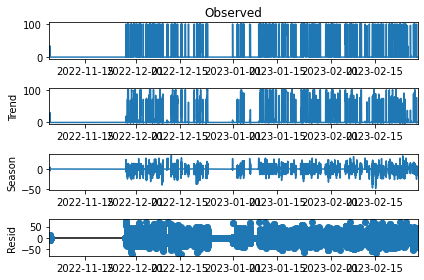

In [133]:
result = STL(day,  period=24).fit()
result.plot()
plt.show()

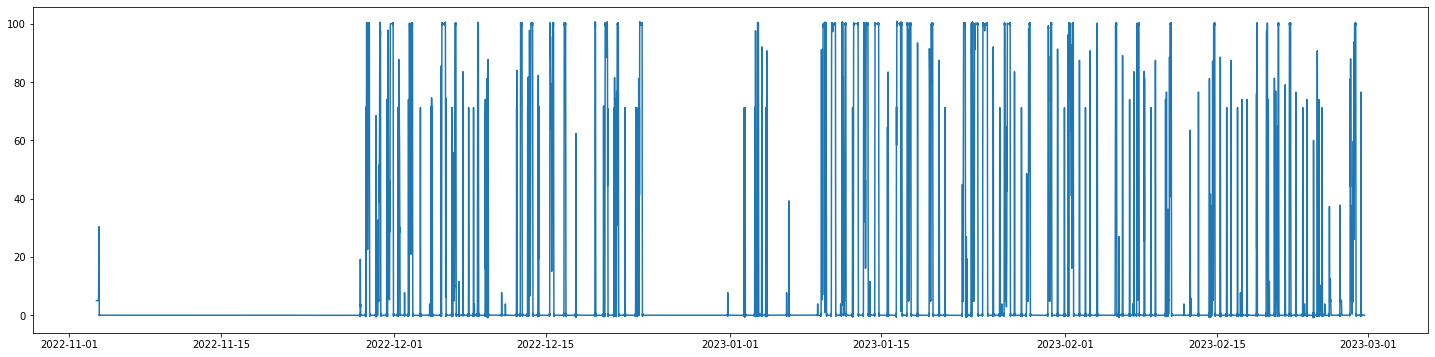

In [134]:
plt.figure(figsize=(25,6))
plt.plot(result.trend)

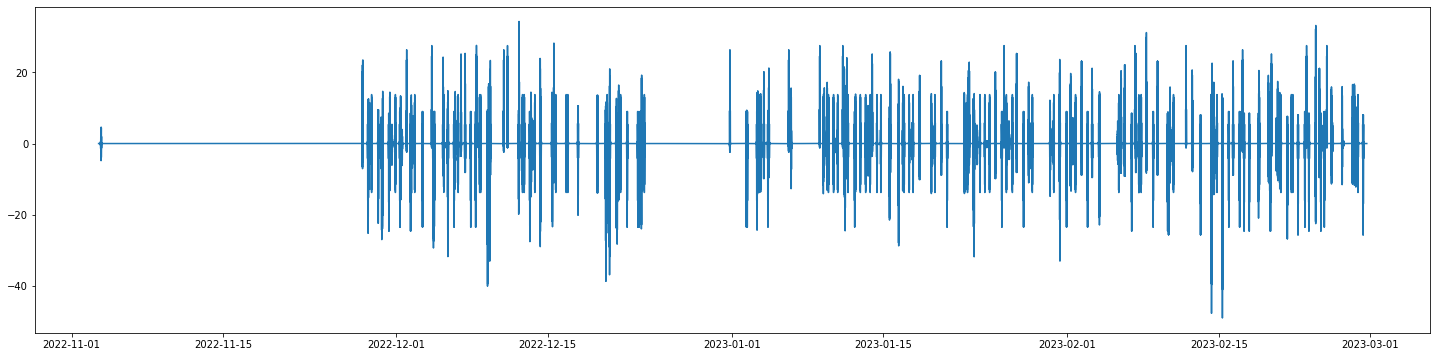

In [135]:
plt.figure(figsize=(25,6))
plt.plot(result.seasonal)

### Analysis daylight without school holidays:


We can consider school holidays to be outliers since the amount of people going throught the University is limited and not as active as in normal times, so it would make the data very iregualr.

In [136]:
!pip install workalendar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 KB 5.5 MB/s eta 0:00:00


In [137]:
from workalendar.europe import NetherlandsWithSchoolHolidays as NL

In [138]:
cal = NL(region='north')
holidays = cal.holidays(2022) + cal.holidays(2023)
holidays

[(datetime.date(2022, 1, 1), 'Christmas holiday'),
 (datetime.date(2022, 1, 1), 'New year'),
 (datetime.date(2022, 1, 2), 'Christmas holiday'),
 (datetime.date(2022, 1, 3), 'Christmas holiday'),
 (datetime.date(2022, 1, 4), 'Christmas holiday'),
 (datetime.date(2022, 1, 5), 'Christmas holiday'),
 (datetime.date(2022, 1, 6), 'Christmas holiday'),
 (datetime.date(2022, 1, 7), 'Christmas holiday'),
 (datetime.date(2022, 1, 8), 'Christmas holiday'),
 (datetime.date(2022, 1, 9), 'Christmas holiday'),
 (datetime.date(2022, 2, 19), 'Spring holiday'),
 (datetime.date(2022, 2, 20), 'Spring holiday'),
 (datetime.date(2022, 2, 21), 'Spring holiday'),
 (datetime.date(2022, 2, 22), 'Spring holiday'),
 (datetime.date(2022, 2, 23), 'Spring holiday'),
 (datetime.date(2022, 2, 24), 'Spring holiday'),
 (datetime.date(2022, 2, 25), 'Spring holiday'),
 (datetime.date(2022, 2, 26), 'Spring holiday'),
 (datetime.date(2022, 2, 27), 'Spring holiday'),
 (datetime.date(2022, 4, 15), 'Good Friday'),
 (datetime.d

In [139]:
len(cal.holidays(2022))

99

In [140]:
day.index[50000].date()

datetime.date(2022, 12, 31)

In [141]:
cal.holidays(2022)[-1][0]

datetime.date(2022, 12, 31)

In [142]:
day.index[50000].date() == cal.holidays(2022)[-1][0]

True

In [143]:
holidays[0][0]

datetime.date(2022, 1, 1)

In [144]:
day.index

DatetimeIndex(['2022-11-03 11:52:00', '2022-11-03 11:53:00',
               '2022-11-03 11:54:00', '2022-11-03 11:55:00',
               '2022-11-03 11:56:00', '2022-11-03 11:57:00',
               '2022-11-03 11:58:00', '2022-11-03 11:59:00',
               '2022-11-03 12:01:00', '2022-11-03 12:02:00',
               ...
               '2023-02-28 15:58:00', '2023-02-28 15:59:00',
               '2023-02-28 16:01:00', '2023-02-28 16:02:00',
               '2023-02-28 16:03:00', '2023-02-28 16:04:00',
               '2023-02-28 16:05:00', '2023-02-28 16:06:00',
               '2023-02-28 16:07:00', '2023-02-28 16:08:00'],
              dtype='datetime64[ns]', name='time', length=134757, freq=None)

In [145]:
len(holidays)

198

In [146]:
nday = day

In [147]:
date_holi = [(a) for a , b in holidays]
date_holi

[datetime.date(2022, 1, 1),
 datetime.date(2022, 1, 1),
 datetime.date(2022, 1, 2),
 datetime.date(2022, 1, 3),
 datetime.date(2022, 1, 4),
 datetime.date(2022, 1, 5),
 datetime.date(2022, 1, 6),
 datetime.date(2022, 1, 7),
 datetime.date(2022, 1, 8),
 datetime.date(2022, 1, 9),
 datetime.date(2022, 2, 19),
 datetime.date(2022, 2, 20),
 datetime.date(2022, 2, 21),
 datetime.date(2022, 2, 22),
 datetime.date(2022, 2, 23),
 datetime.date(2022, 2, 24),
 datetime.date(2022, 2, 25),
 datetime.date(2022, 2, 26),
 datetime.date(2022, 2, 27),
 datetime.date(2022, 4, 15),
 datetime.date(2022, 4, 17),
 datetime.date(2022, 4, 18),
 datetime.date(2022, 4, 27),
 datetime.date(2022, 4, 30),
 datetime.date(2022, 5, 1),
 datetime.date(2022, 5, 2),
 datetime.date(2022, 5, 3),
 datetime.date(2022, 5, 4),
 datetime.date(2022, 5, 5),
 datetime.date(2022, 5, 5),
 datetime.date(2022, 5, 6),
 datetime.date(2022, 5, 7),
 datetime.date(2022, 5, 8),
 datetime.date(2022, 5, 26),
 datetime.date(2022, 6, 5),
 date

In [148]:
valid_holidays = []
for d in date_holi:
  if d >= day.index[0].date():
    valid_holidays.append(d)

In [149]:
valid_holidays

[datetime.date(2022, 12, 24),
 datetime.date(2022, 12, 25),
 datetime.date(2022, 12, 25),
 datetime.date(2022, 12, 26),
 datetime.date(2022, 12, 26),
 datetime.date(2022, 12, 27),
 datetime.date(2022, 12, 28),
 datetime.date(2022, 12, 29),
 datetime.date(2022, 12, 30),
 datetime.date(2022, 12, 31),
 datetime.date(2023, 1, 1),
 datetime.date(2023, 1, 1),
 datetime.date(2023, 1, 2),
 datetime.date(2023, 1, 3),
 datetime.date(2023, 1, 4),
 datetime.date(2023, 1, 5),
 datetime.date(2023, 1, 6),
 datetime.date(2023, 1, 7),
 datetime.date(2023, 1, 8),
 datetime.date(2023, 2, 25),
 datetime.date(2023, 2, 26),
 datetime.date(2023, 2, 27),
 datetime.date(2023, 2, 28),
 datetime.date(2023, 3, 1),
 datetime.date(2023, 3, 2),
 datetime.date(2023, 3, 3),
 datetime.date(2023, 3, 4),
 datetime.date(2023, 3, 5),
 datetime.date(2023, 4, 7),
 datetime.date(2023, 4, 9),
 datetime.date(2023, 4, 10),
 datetime.date(2023, 4, 27),
 datetime.date(2023, 4, 29),
 datetime.date(2023, 4, 30),
 datetime.date(2023,

In [150]:
nday.index[0].date()

datetime.date(2022, 11, 3)

In [151]:
index_list = []
for i in range(len(nday.index)):
  if nday.index[i].date() in valid_holidays:
    index_list.append(i)

len(index_list)

28305

In [152]:
vindx_day = nday.index.delete(index_list)

In [153]:
len(vindx_day)

106452

In [154]:
len(set(vindx_day))

106452

In [155]:
len(day.index)

134757

In [156]:
len(set(day.index))

134757

In [157]:
daylight_without_holidays = nday.filter(items=vindx_day, axis=0)

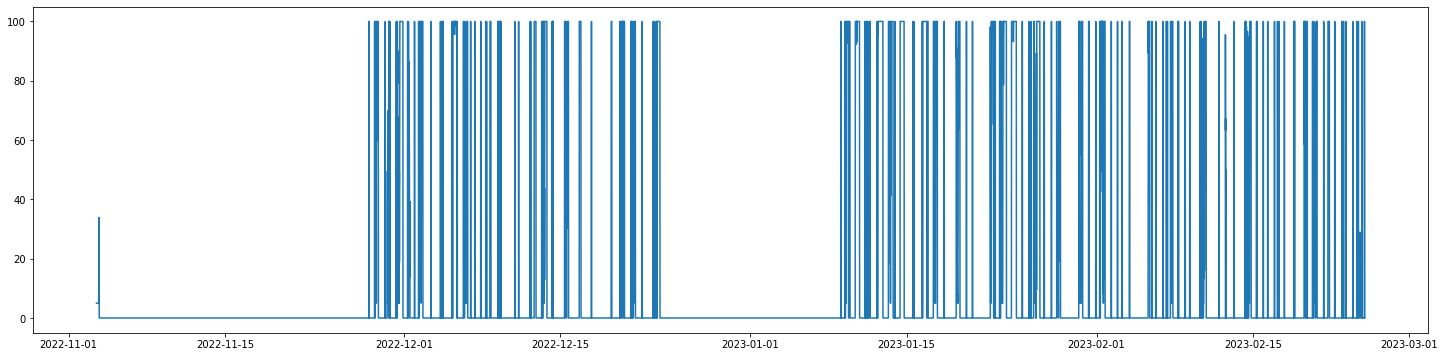

In [158]:
plt.figure(figsize=(25,6))
plt.plot(daylight_without_holidays)

<Figure size 7200x1800 with 0 Axes>

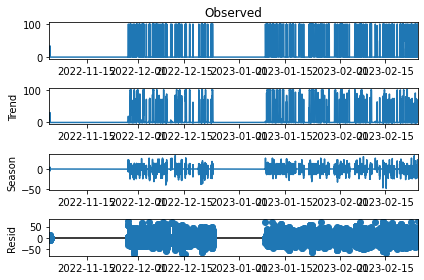

In [159]:
result2 = STL(daylight_without_holidays,  period=24).fit()
plt.figure(figsize=(100,25))
result2.plot()
plt.show()

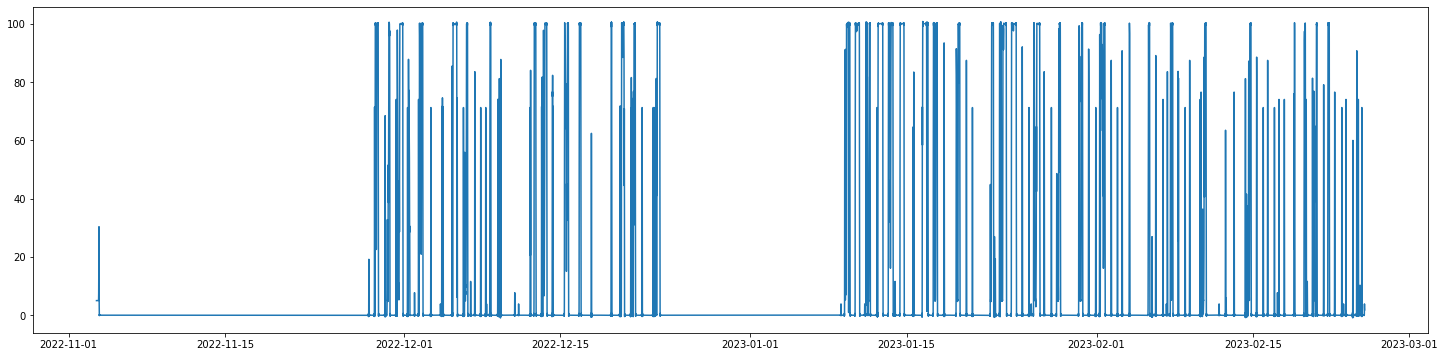

In [160]:
plt.figure(figsize=(25,6))
plt.plot(result2.trend)

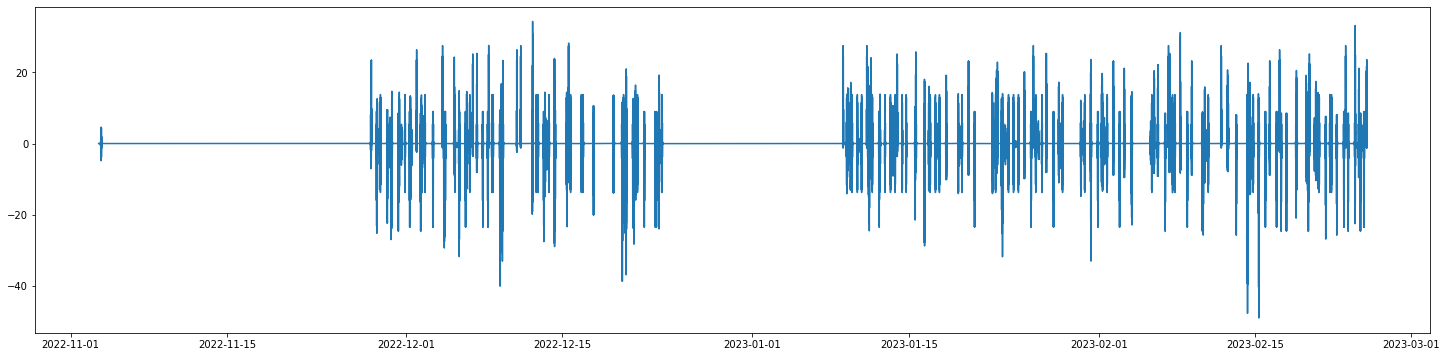

In [161]:
plt.figure(figsize=(25,6))
plt.plot(result2.seasonal)

### Analysis 3 removing long sequences of 0

We assume that the long sequence of 0 do not mean necessarilly that there is no light but that there could be an issue with the sensor we want to drop these areas from the data to have a better understanding of it.